### Reference
- https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### 1. cmap 을 리스트로 만들어 놓고 사용하기

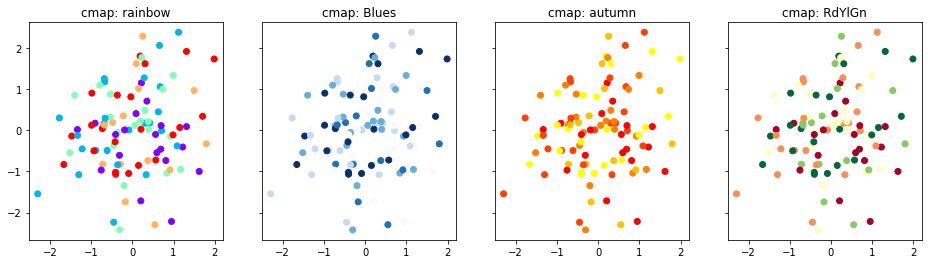

In [2]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
C = np.random.randint(0, 5, 100)
cmap_lst = [plt.cm.rainbow, plt.cm.Blues, plt.cm.autumn, plt.cm.RdYlGn]

f, axes = plt.subplots(1, 4, sharex=True, sharey=True)
f.set_size_inches((16, 4)) 
for i in range(0, 4):
    axes[i].scatter(X, Y, c=C, cmap=cmap_lst[i])
    axes[i].set_title("cmap: {}".format(cmap_lst[i].name))

### 2. 색깔로 정도 표현 vs 색깔로 카테고리 구분

#### 정도 표현

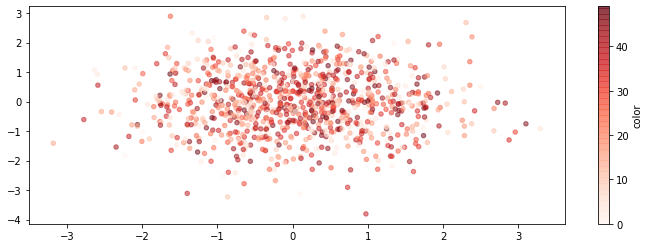

In [3]:
sample_size = 1000
color_num = 50

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)
C = np.random.randint(0, color_num, sample_size)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
scatter = ax.scatter(X, Y, c=C, s=20, cmap=plt.cm.Reds, alpha=0.5)
fig.colorbar(scatter, label='color')

#### Category 구분

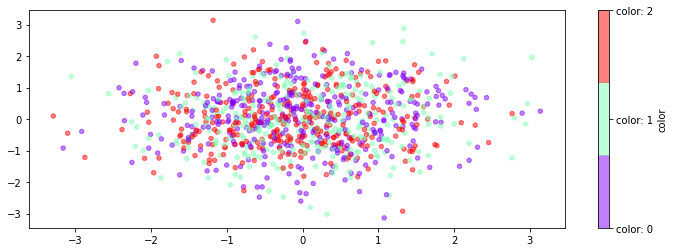

In [4]:
sample_size = 1000
color_num = 3

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)
C = np.random.randint(0, color_num, sample_size)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
scatter = ax.scatter(X, Y, c=C, s=20, cmap=plt.cm.get_cmap('rainbow', color_num), alpha=0.5)
fig.colorbar(scatter, ticks=range(color_num), format='color: %d', label='color')

### Problems

### label is an array, not distinctive

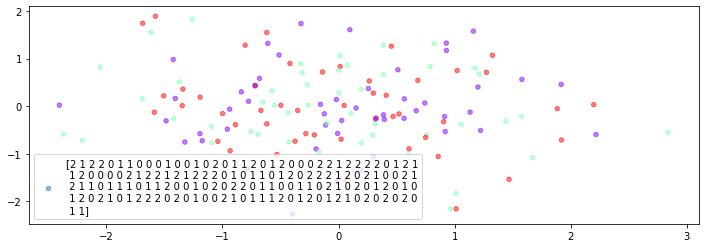

In [25]:
sample_size = 150
color_num = 3

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)
C = np.random.randint(0, color_num, sample_size)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
scatter = ax.scatter(X, Y, c=C, s=20
                     , cmap=plt.cm.get_cmap('rainbow', color_num), alpha=0.5
                     , label=C)
ax.legend()

### label is distinct, but has the same number of data

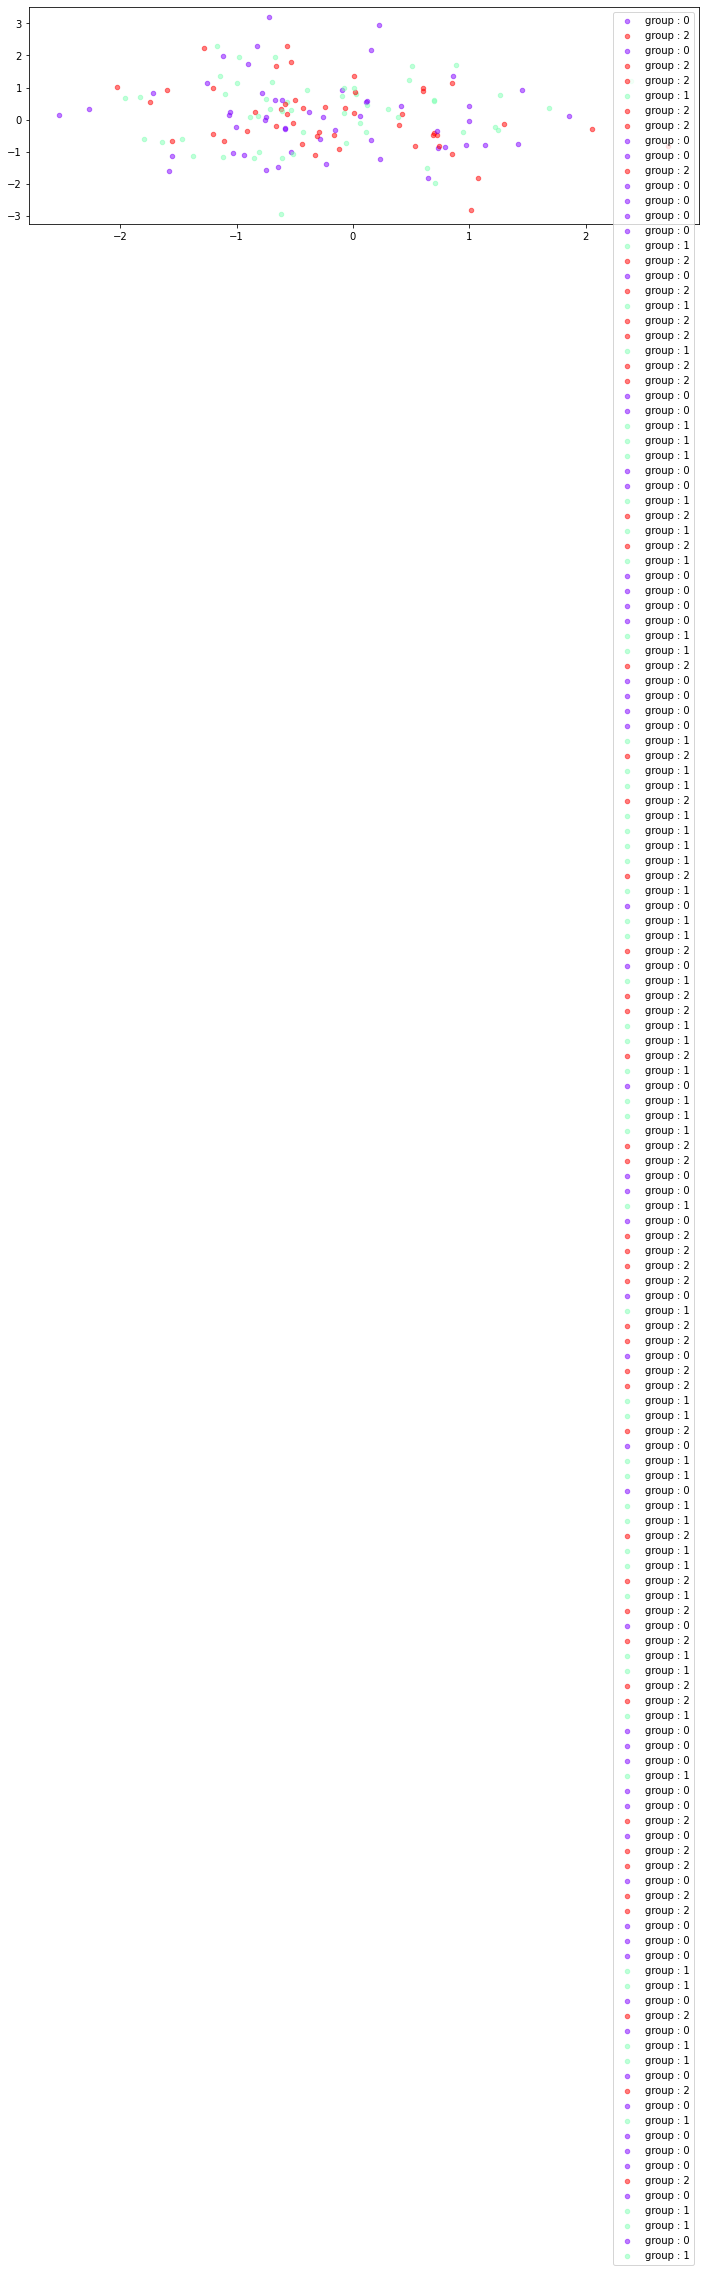

In [26]:
sample_size = 150
color_num = 3

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)
C = np.random.randint(0, color_num, sample_size)

c_list = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, color_num)]

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
for i in range(len(X)):
    ax.scatter(X[i], Y[i], color=c_list[C[i]], s=20, alpha=0.5
                       , label='group : {}'.format(C[i]))
ax.legend()

### Colorbar 대신 Legend Box 를 쓰기

In [5]:
for a in np.linspace(0, 1.0, 5):
    print(plt.cm.rainbow(a))

(0.5, 0.0, 1.0, 1.0)
(0.0019607843137254832, 0.7092813076058534, 0.9232891061054893, 1.0)
(0.503921568627451, 0.9999810273487268, 0.7049255469061472, 1.0)
(1.0, 0.7005430375932911, 0.37841105004231035, 1.0)
(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import itertools

sample_size = 100
x = np.vstack([
    np.random.normal(0, 1, sample_size).reshape(sample_size//2, 2), 
    np.random.normal(2, 1, sample_size).reshape(sample_size//2, 2), 
    np.random.normal(4, 1, sample_size).reshape(sample_size//2, 2)
])
# chain.from_iterable(['ABC', 'DEF']) --> A B C D E F
y = np.array(list(itertools.chain.from_iterable([ [i+1 for j in range(0, sample_size//2)] for i in range(0, 3)])))
y = y.reshape(-1, 1)

In [7]:
x.shape, y.shape

((150, 2), (150, 1))

In [8]:
df = pd.DataFrame(np.hstack([x, y]), columns=['x1', 'x2', 'y'])

In [9]:
df.tail(5)

,x1,x2,y
145,4.538016,3.229538,3.0
146,5.346470,4.281028,3.0
147,2.575309,5.999110,3.0
148,3.546608,4.136032,3.0
149,1.610137,5.726108,3.0


In [12]:
for i, g in enumerate(df.groupby('y')):
    print(type(g))
    print(type(g[0]), g[0])
    print(type(g[1]))    

<class 'tuple'>
<class 'float'> 1.0
<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>
<class 'float'> 2.0
<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>
<class 'float'> 3.0
<class 'pandas.core.frame.DataFrame'>


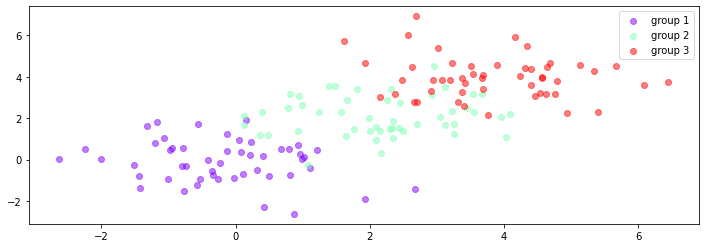

In [14]:
# get the color list from cm.rainbow (0, 0.5, 1.)
c_list = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, len(set(df['y'])))]

plt.figure(figsize=(12, 4))
for i, g in enumerate(df.groupby('y')):
    plt.scatter(g[1]['x1'], g[1]['x2'], color=c_list[i], label='group {}'.format(int(g[0])), alpha=0.5)
plt.legend()